## __Statistical and Linguistic Insights for Model Explanation - SLIME__ 
### __Model explainability__
<font size=3>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

from os import environ
environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from slime_nlp.dataset import ImportData
from slime_nlp.model import CustomModel
from slime_nlp.slime import ExplainModel
from slime_nlp.slime import Stat

## 1. __$\mathtt{ExplainModel}$:__
<font size=3>
    
For model explainability, we use the $\mathtt{ExplainModel}$ object, which provides:

* $\mathtt{explain()}$: Computes attribution scores for the text.
* $\mathtt{model\_prediction()}$: Returns predictions using the fine-tuned $\mathtt{CustomModel}$ weights.
* $\mathtt{visualize()}$: Highlights text tokens with attribution scores based on [Integrated Gradients](https://arxiv.org/abs/1703.01365).
* $\mathtt{attribution\_by\_token()}$: Outputs a dataframe containing explainability scores for each token.

Refer to the $\mathtt{ExplainModel}$ documentation below for details.

In [2]:
exp = ExplainModel(model_name="../weights/best_model.pt", n_steps=10)  

print(exp.__doc__)


    # ExplainModel: model explanability tools for data processing and visualization.
    
    Input: (model_name=None, device='cpu', n_steps=50, pretrained_name="google-bert/bert-base-cased")
    -----
    - model_name (str): string with the path and model's name.
    - device (str): select CPU or GPU device for output tensors.
    - n_steps (int): number of steps for Integrated Gradient approximation.
    - pretained_name (str): pretrained model name from huggingface.co repository.
    
    
    Methods:
    -------
    - explain: (text)
      -- text (str): text as string format.
    
      Returns a dictionary with 
      > input_ids (Tensor[int]): sequence of special tokens IDs.
      > token_list (List[str]): of tokens.
      > attributions (Tensor[float]): Integrated Gradient's attribution score by token.
      > delta (Tensor[float]): Integrated Gradient's error metric.
    
    - model_prediction: (input_ids)
      -- input_ids (Tensor): sequence of special tokens IDs.
    
  

In [3]:
# Import dataset:
id = ImportData(path_name="../dataset/adress_sample.csv", group_by=["id", "text", "group"], shuffle=False, verbose=False)

text = id.train['text'][0]
text

"oh there's a cookie jar and a youngster with a i don't know what . and the boy has a shirt with a cookie <filler> jar too i guess . the girl has one too a jar . and that's the stool . and this is <filler> with a kitchen thing <filler> dishes . and this is water somebody spilled . what do you call this . i don't know . i guess it's another for the . i don't know what's hɑɹu xn nuk in there . the tentu xn nuk very interesting . oh <filler> . she's looking at it . i don't know what . that the kid's gonna fall off the stool . i hope he does . oh they're in the cookie jar . oh what are they doing . i don't know . they're spilling something good and . it's <retracing> they're doing the dishes . the boy's trying to fall off the stool and she's trying to get"

#### __1.1 $\mathtt{ExplainModel().explain()}$:__
<font size=3>

Computing the attributions from text.

In [4]:
exp_results = exp.explain(text)
exp_results.keys()

dict_keys(['input_ids', 'token_list', 'attributions', 'delta'])

#### __1.2 $\mathtt{ExplainModel().model\_prediction()}$:__
<font size=3>

Predicting condition from CustomModel.

In [5]:
pred = exp.model_prediction(exp_results['input_ids'])
pred.keys()

dict_keys(['prob', 'class'])

#### __1.3 $\mathtt{ExplainModel().visualize()}$:__
<font size=3>

The user can choose to view attributions for a specific text sample, with a color gradient indicating which tokens contribute the most to the groups.

In [6]:
data = id.train.iloc[0:2]
exp.visualize(data, cmap_size=15, colors=['blue', 'white', 'red'], path_name='../figs/exp.png')

Old Headless mode will be removed from the Chrome binary soon. Please use the new Headless mode (https://developer.chrome.com/docs/chromium/new-headless) or the chrome-headless-shell which is a standalone implementation of the old Headless mode (https://developer.chrome.com/blog/chrome-headless-shell).

[0111/172742.513322:WARNING:sandbox_linux.cc(430)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/172742.513929:WARNING:viz_main_impl.cc(85)] VizNullHypothesis is disabled (not a warning)
82209 bytes written to file /home/tiberio/bioinfo/slime_nlp/figs/exp_S118.png


True Label,Predicted Label,Predicted probability,Attribution Score
condition,condition,1.00,2.58


Old Headless mode will be removed from the Chrome binary soon. Please use the new Headless mode (https://developer.chrome.com/docs/chromium/new-headless) or the chrome-headless-shell which is a standalone implementation of the old Headless mode (https://developer.chrome.com/blog/chrome-headless-shell).

[0111/172744.991877:WARNING:sandbox_linux.cc(430)] InitializeSandbox() called with multiple threads in process gpu-process.
[0111/172744.992481:WARNING:viz_main_impl.cc(85)] VizNullHypothesis is disabled (not a warning)
88858 bytes written to file /home/tiberio/bioinfo/slime_nlp/figs/exp_S177.png


True Label,Predicted Label,Predicted probability,Attribution Score
control,control,0.00,-4.77


#### __1.4 $\mathtt{ExplainModel().attribution\_by\_token()}$:__
<font size=3>

Create dataframe with attribution scores by text's tokens.

In [7]:
df = exp.attribution_by_token(data, path_name="../dataset/explain_by_token.csv", return_results=True)
df.head()

,condition,group,pred_label,score,attributions,token
id,,,,,,
S118,AD,1,1,2.580766,0.000000,[CLS]
S118,AD,1,1,2.580766,0.025740,oh
S118,AD,1,1,2.580766,0.093974,there
S118,AD,1,1,2.580766,0.069379,'
S118,AD,1,1,2.580766,0.100859,s


## __2. $\mathtt{Stat}$:__
<font size=3>

The $\mathtt{Stat}$ object provides tools for analyzing the impact of group classification on token attributions. 

* $\mathtt{plot\_dist()}$: Returns distribution density plots of feature attributions across all tokens to assess group relevance.
* $\mathtt{plot\_scatter()}$: Returns a plots with all linguistic features distinguishing from the AUC median of random subsamples.
* $\mathtt{plot\_bars()}$: Returns a bar plot as an alternative visualization from the scatter plot.

Check the object's docstring below.

In [8]:
stat = Stat(path_data="../dataset/interpret.csv", 
            features=["BigWords"], 
            rand_value=5000, 
            path_results=None)

print(stat.__doc__)

from pandas import read_csv
#stat.results = read_csv("../dataset/adress_analysis.csv")
stat.results = read_csv("../dataset/stat_test.csv")


    # Stat: Statistical analysis for token attributions.

    Input: (path_data, features, rand_value=5000, path_results=None)
    -----
    - path_data (str): string with path and dataset name. This file is the user-dependent tagger output, 
    containing columns for tokens and associated features.
    - features (List): list of features processed by the user-dependent tagger statistical computation. 
    Use Ellipsis (...) for considering an specific feature and its following ones, e.g, 
    features=["BigWords", ...].
    - rand_value (int): number of random subsamples of data. 
    - path_results (str): string with path and dataframe results' name for saving in .csv file.


    Methods:
    -------
    - plot_dist: (features, path_plot=None)
      -- features (List): list of features processed by the user-dependent tagger for visualization. Use 
      Ellipsis (...) for considering an specific feature and its following ones, e.g, 
      features=["BigWords", ...].
      -- path_p

In [9]:
stat.results

,feature,AUC_impact,AUC,AUC_random,AUC_diff,group,attribution,count,percentile
0,BigWords,negative,0.769888,0.898545,-0.128657,control,-0.032902,117200,0.0000
1,Dic,positive,0.992932,0.987179,0.005753,control,-0.013409,1160400,0.9930
2,Linguistic,none,0.979783,0.984550,-0.004767,control,-0.005740,956100,0.1410
3,function,negative,0.962525,0.981591,-0.019066,control,-0.006988,788700,0.0044
4,pronoun,none,0.940335,0.927022,0.013314,condition,0.015589,183300,0.7748
...,...,...,...,...,...,...,...,...,...
106,Comma,none,0.500000,0.500000,0.000000,none,NaN,0,1.0000
107,QMark,none,0.500000,0.500000,0.000000,none,NaN,0,1.0000
108,Exclam,none,0.500000,0.500000,0.000000,none,NaN,0,1.0000
109,Apostro,none,0.500000,0.500000,0.000000,none,NaN,0,1.0000


#### __2.1 $\mathtt{Stat().plot\_dist()}$__:
<font size=3>

Generates distribution density plots of feature attributions across all tokens to assess group relevance.

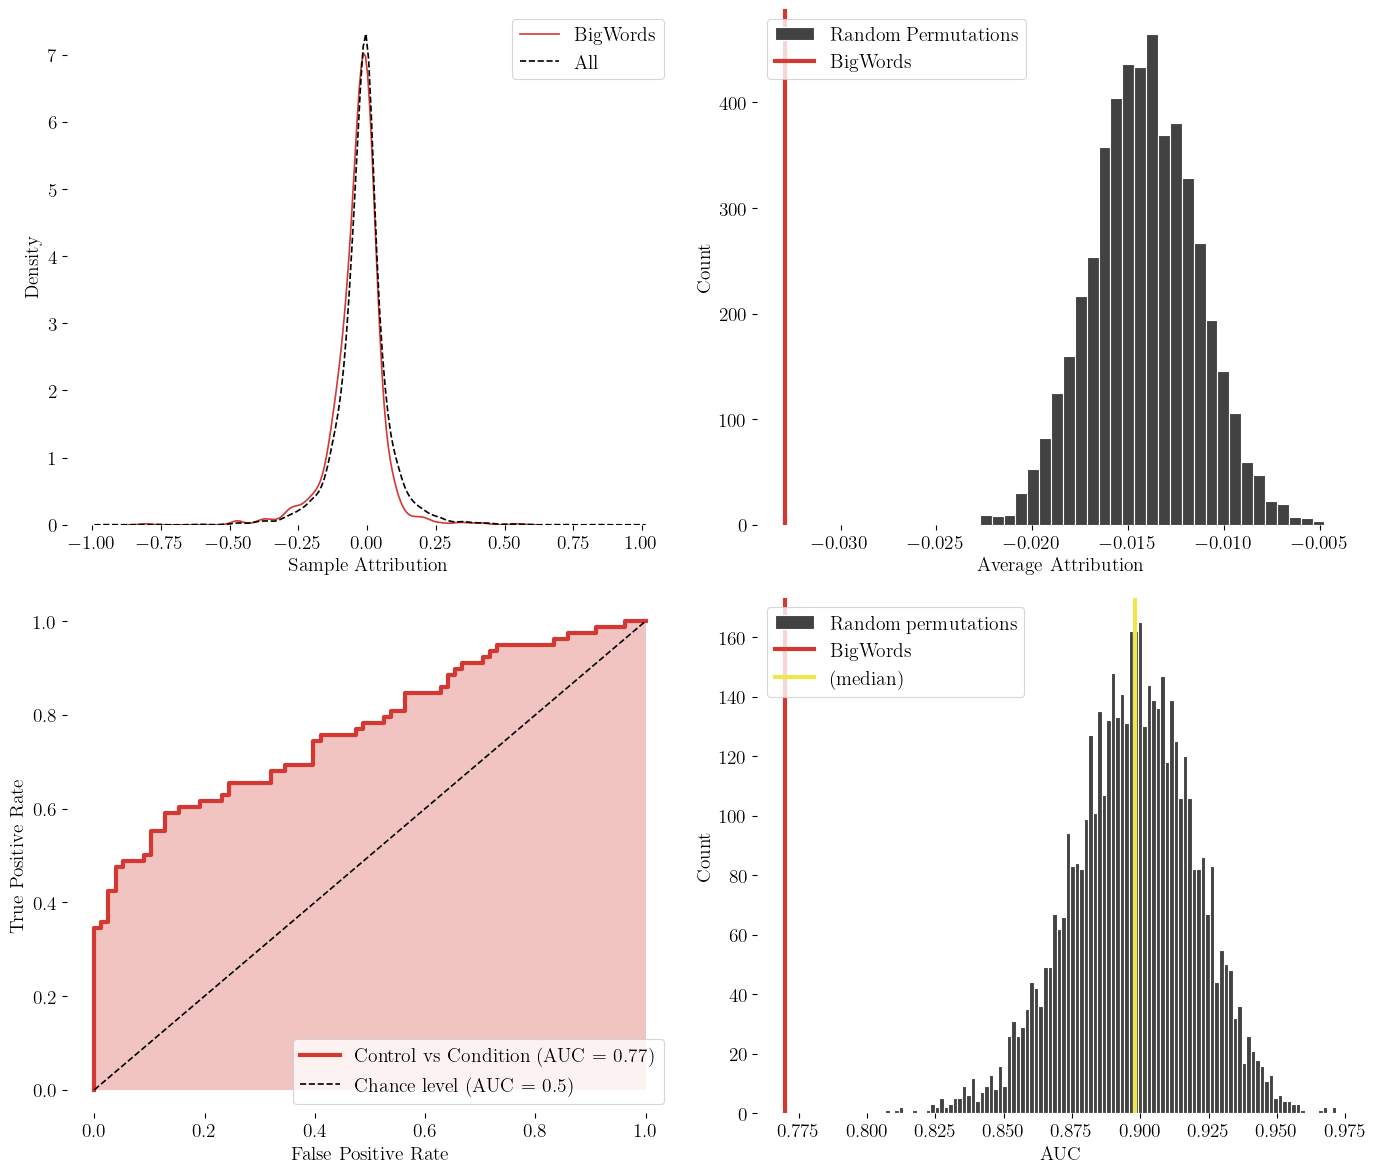

In [10]:
stat.plot_dist(features=['BigWords'], path_plot="../figs/stat_dist.png")

#### __2.2 $\mathtt{Stat().plot\_scatter()}$:__
<font size=3>

Generates a plots with all linguistic features distinguishing from the AUC median of random subsamples.

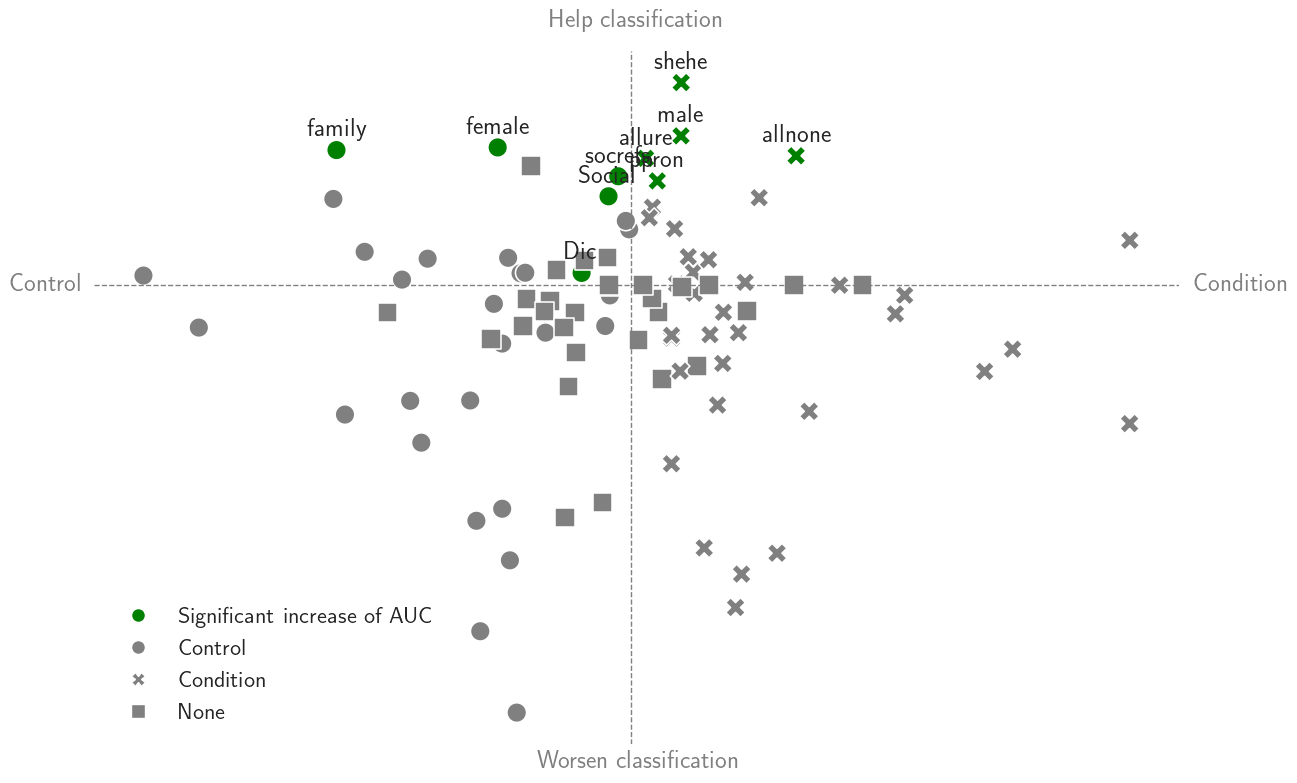

In [11]:
stat.plot_scatter(path_plot="../figs/stat_scatter.png")

#### __2.3 $\mathtt{Stat().plot\_bars()}$:__
<font size=3>
    
Generates a bar plot as an alternative visualization from the scatter plot.

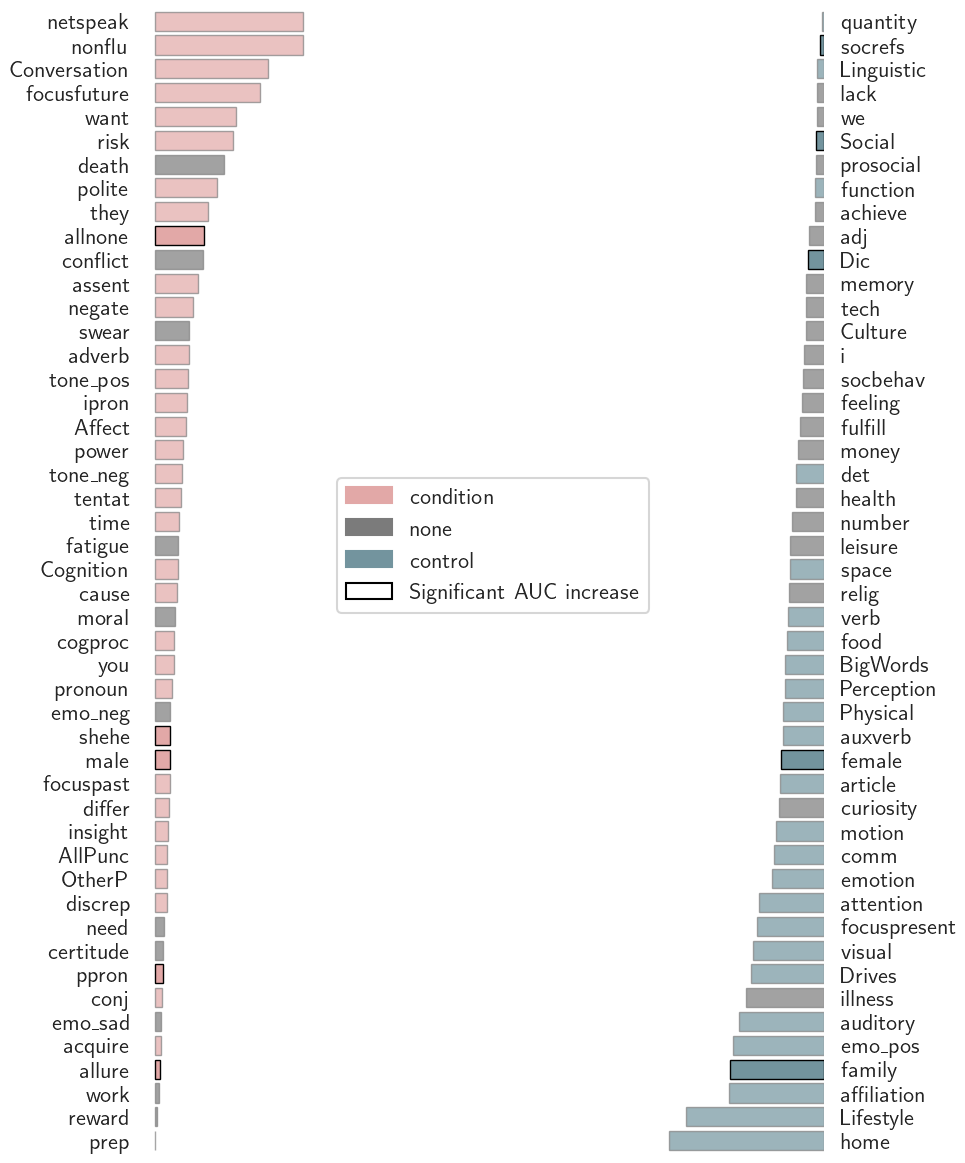

In [12]:
stat.plot_bars(path_plot="../figs/stat_scatter.png")